# Team Trini Machine Learning Project: SMS Spam Classification

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## 2. Load Data

In [2]:
messages = pd.read_csv("./spam.csv",encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 2.1. Data Preprocessing 

## 2.1.1. Drop the unnamed columns and change column 'v1' to 'label' and 'v2' to 'text'

In [3]:
messages = messages.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
messages = messages.rename(columns={"v1":"label", "v2":"text"})
messages.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


## 2.1.2. Convert the column 'label' to have numerical values for 'ham' and 'spam'

In [4]:
messages['label_num'] = messages.label.map({'ham':0, 'spam':1})
messages.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## 2.1.3. Drop rows of dataframe whose value is 'NaN'

In [5]:
messages.dropna(subset=['text'])
#Count the number of observations for each label 'ham' and 'spam'
ham_count,spam_count = messages.label.value_counts()
print(messages.label.value_counts())

ham     4825
spam     747
Name: label, dtype: int64


## 2.2. Explore Data

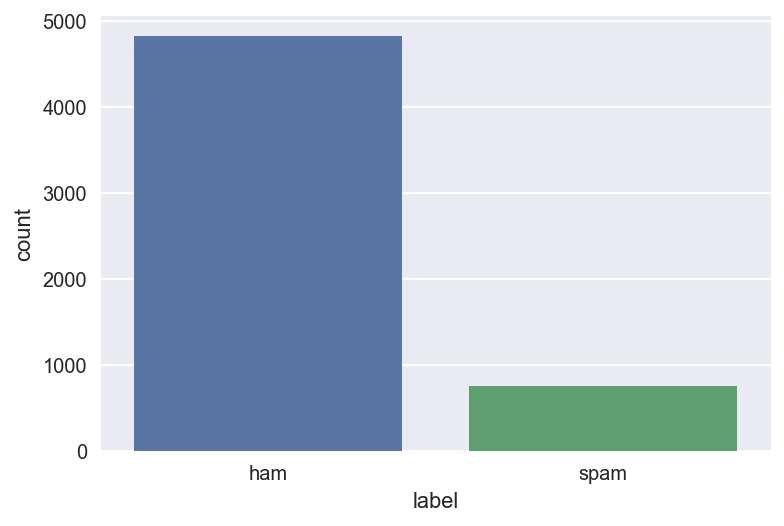

In [6]:
sns.countplot(x="label",data=messages)

In [7]:
messages.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam      747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

#### Check if there is any connection between the lengths of spam and ham messages 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018258FBB278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000182590E84E0>], dtype=object)

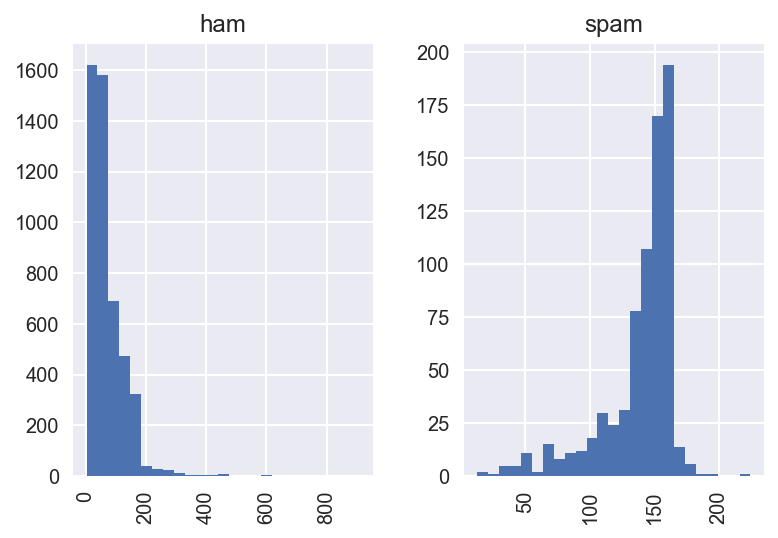

In [8]:
messages['length'] = messages['text'].map(lambda text: len(text))
messages.hist(column='length', by='label', bins=25) 

## 2.3. Data Visualization

In [9]:
import nltk
from nltk.corpus import stopwords
ham_words = ''
spam_words = ''
spam = messages[messages.label_num == 1]
ham = messages[messages.label_num ==0]

In [10]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

### Generate word cloud images

In [11]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

### Spam Word Cloud:

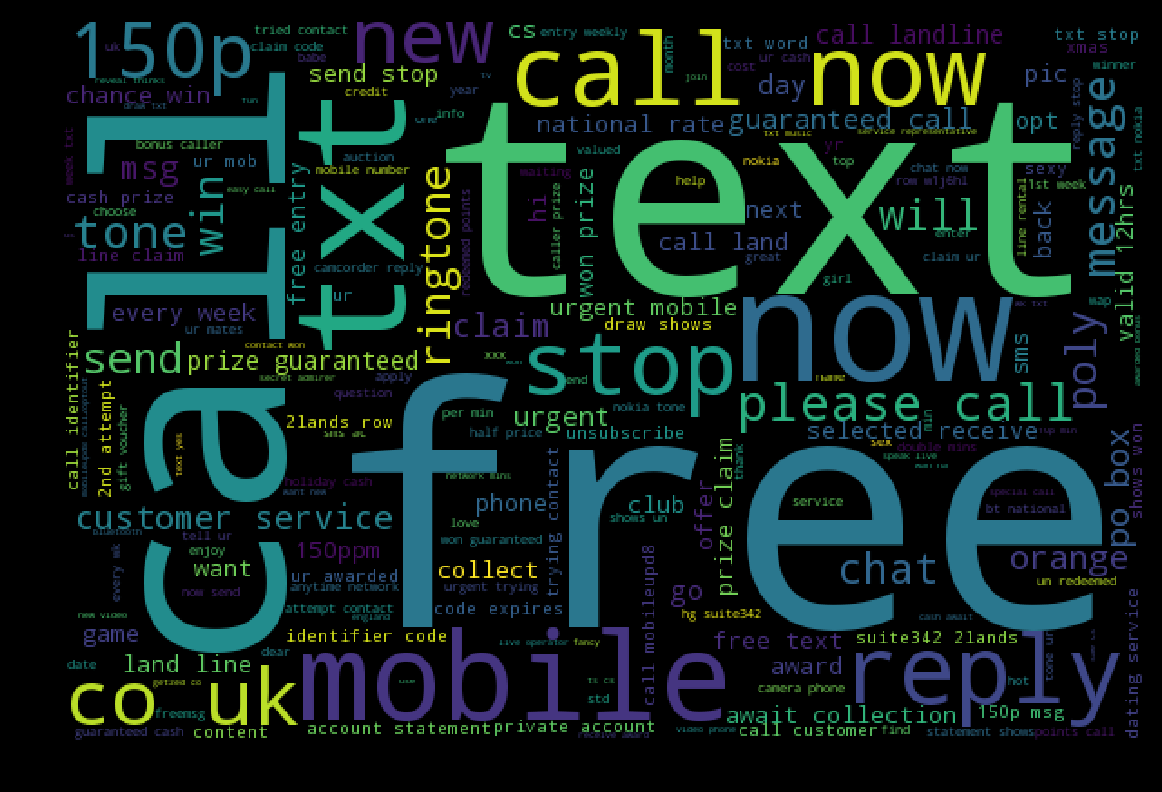

In [12]:
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Ham Word Cloud:

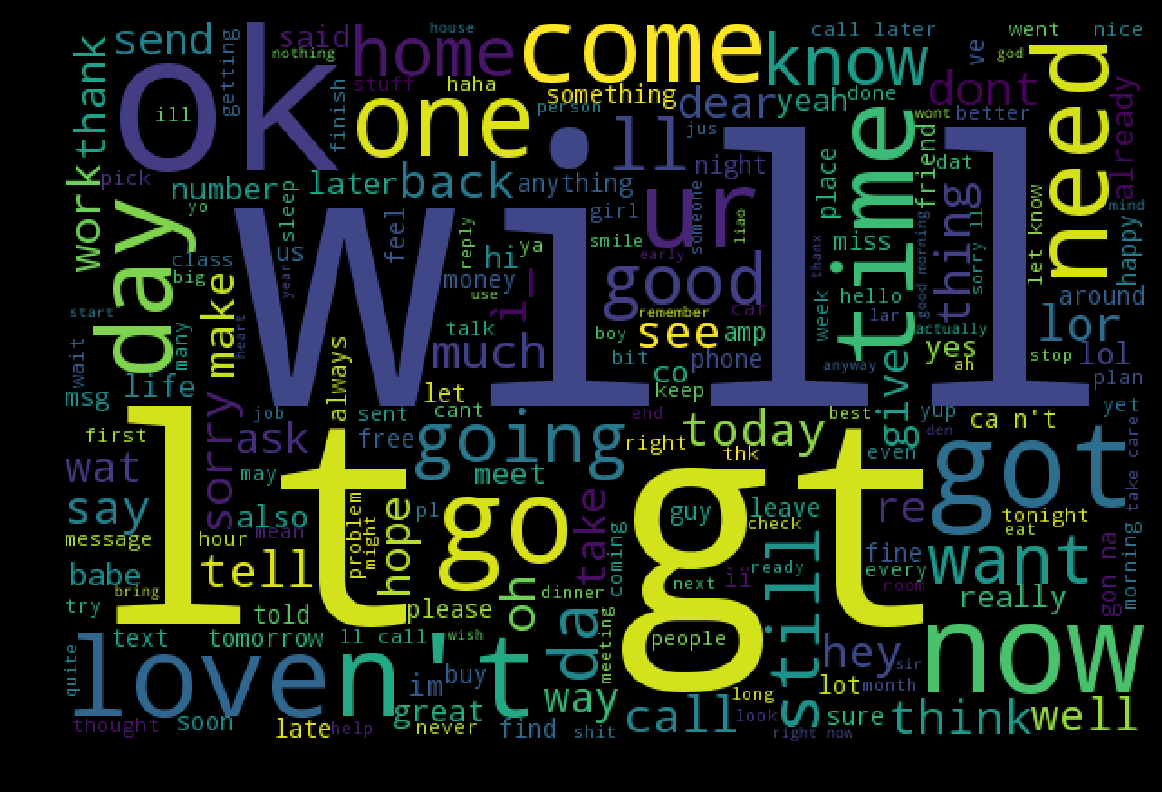

In [13]:
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 3. Split data into Train and Test datasets

In [14]:
from sklearn.model_selection import KFold
#Construct a k-folds object
X = messages["text"]
y = messages["label_num"]
kf = KFold(n_splits=10,shuffle = True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5015,)
(557,)
(5015,)
(557,)


## 3.1. Text transformation

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['zouk', 'zyada', 'åè10', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûò', 'ûówell']


In [17]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

## 4. Apply Different Classification Models

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
prediction = dict()
conf_mat = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()
accuracy = dict()

## 4.1. Multinomial Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
prediction["Multinomial_Naive_Bayes"] = nb.predict(X_test_df)

In [21]:
accuracy["Multinomial_Naive_Bayes"] = accuracy_score(y_test,prediction["Multinomial_Naive_Bayes"])
print(accuracy["Multinomial_Naive_Bayes"])

0.971274685817


In [22]:
print(classification_report(y_test, prediction['Multinomial_Naive_Bayes'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.97      1.00      0.98       467
       Spam       0.97      0.84      0.90        90

avg / total       0.97      0.97      0.97       557



In [23]:
conf_mat["Multinomial_Naive_Bayes"] = confusion_matrix(y_test, prediction['Multinomial_Naive_Bayes'])
conf_mat_normalized = conf_mat["Multinomial_Naive_Bayes"].astype('float') / conf_mat["Multinomial_Naive_Bayes"].sum(axis=1)[:, np.newaxis]

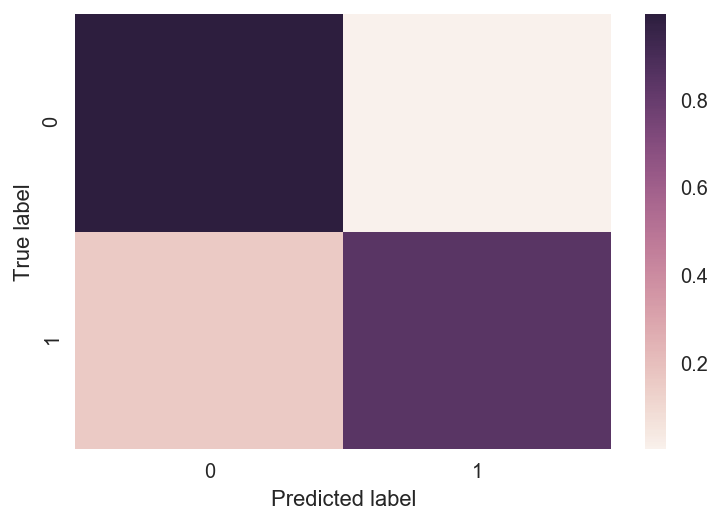

In [24]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
print(conf_mat["Multinomial_Naive_Bayes"])

[[465   2]
 [ 14  76]]


In [26]:
print(roc_auc_score(y_test,prediction["Multinomial_Naive_Bayes"]))

0.920080894599


In [27]:
fpr["Multinomial_Naive_Bayes"], tpr["Multinomial_Naive_Bayes"], threshold = metrics.roc_curve(y_test,prediction["Multinomial_Naive_Bayes"])
roc_auc["Multinomial_Naive_Bayes"] = metrics.auc(fpr["Multinomial_Naive_Bayes"], tpr["Multinomial_Naive_Bayes"])

## 4.2. Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
prediction["Random_Forest"] = rf.predict(X_test_df)

In [30]:
accuracy["Random_Forest"] = accuracy_score(y_test,prediction["Random_Forest"])
print(accuracy["Random_Forest"])

0.965888689408


In [31]:
print(classification_report(y_test, prediction['Random_Forest'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.96      1.00      0.98       467
       Spam       1.00      0.79      0.88        90

avg / total       0.97      0.97      0.96       557



In [32]:
conf_mat["Random_Forest"] = confusion_matrix(y_test, prediction['Random_Forest'])
conf_mat_normalized = conf_mat["Random_Forest"].astype('float') / conf_mat["Random_Forest"].sum(axis=1)[:, np.newaxis]

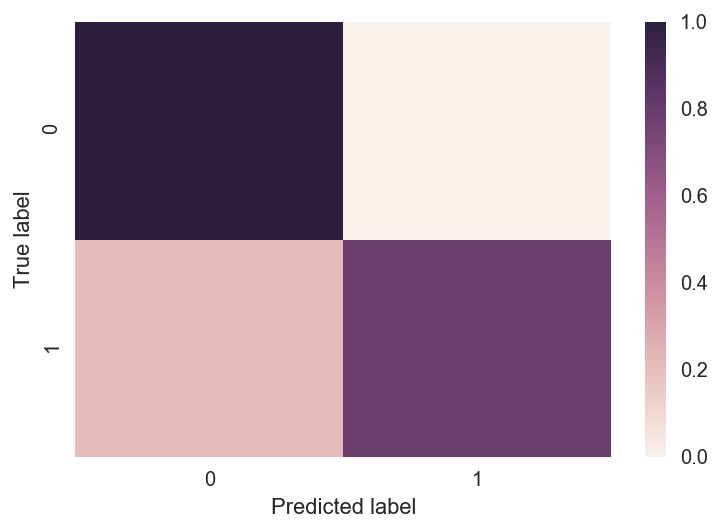

In [33]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [34]:
print(conf_mat["Random_Forest"])

[[467   0]
 [ 19  71]]


In [35]:
print(roc_auc_score(y_test,prediction["Random_Forest"]))

0.894444444444


In [36]:
fpr["Random_Forest"], tpr["Random_Forest"], threshold = metrics.roc_curve(y_test,prediction["Random_Forest"])
roc_auc["Random_Forest"]  = metrics.auc(fpr["Random_Forest"], tpr["Random_Forest"])

## 4.3. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
prediction["Logistic_Regression"] = lr.predict(X_test_df)

In [39]:
accuracy["Logistic_Regression"] = accuracy_score(y_test,prediction["Logistic_Regression"])
print(accuracy["Logistic_Regression"])

0.971274685817


In [40]:
print(classification_report(y_test, prediction['Logistic_Regression'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.97      1.00      0.98       467
       Spam       0.97      0.84      0.90        90

avg / total       0.97      0.97      0.97       557



In [41]:
conf_mat["Logistic_Regression"] = confusion_matrix(y_test, prediction['Logistic_Regression'])
conf_mat_normalized = conf_mat["Logistic_Regression"].astype('float') / conf_mat["Logistic_Regression"].sum(axis=1)[:, np.newaxis]

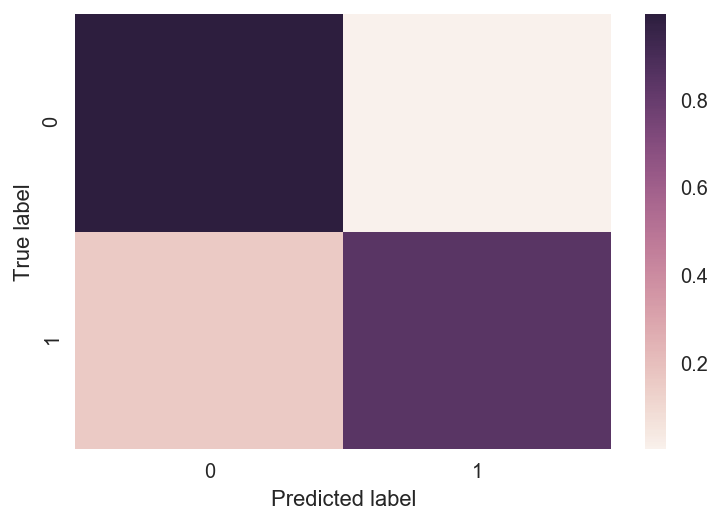

In [42]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
print(conf_mat["Logistic_Regression"])

[[465   2]
 [ 14  76]]


In [44]:
print(roc_auc_score(y_test,prediction["Logistic_Regression"]))

0.920080894599


In [45]:
fpr["Logistic_Regression"], tpr["Logistic_Regression"], threshold = metrics.roc_curve(y_test,prediction["Logistic_Regression"])
roc_auc["Logistic_Regression"]  = metrics.auc(fpr["Logistic_Regression"], tpr["Logistic_Regression"])

## 4.4. Support Vector Machine

### 4.4.1. Using kernel='polynomial' and C='1.25'

In [46]:
from sklearn.svm import SVC
svm_compare = dict()
svc_poly = SVC(kernel='poly', C=1.25, gamma=0.825,class_weight='balanced')
svc_poly.fit(X_train_df,y_train)

SVC(C=1.25, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.825, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svm_compare["SVM_polynomial"] = accuracy_score(y_test,svc_poly.predict(X_test_df))
print(svm_compare["SVM_polynomial"])

0.946140035907


### 4.4.2. Using kernel='rbf' and C='1.25'

In [48]:
svc_rbf = SVC(kernel='rbf', C=1.25, gamma=0.825,class_weight='balanced')
svc_rbf.fit(X_train_df,y_train)

SVC(C=1.25, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.825, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svm_compare["SVM_RBF"] = accuracy_score(y_test,svc_rbf.predict(X_test_df))
print(svm_compare["SVM_RBF"])

0.899461400359


### 4.4.3. Using kernel='linear' and C='1.25'

In [50]:
svc_linear = SVC(kernel='linear', C=1.25, gamma=0.825,class_weight='balanced')
svc_linear.fit(X_train_df,y_train)

SVC(C=1.25, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.825, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
prediction["SVM_linear"] = svc_linear.predict(X_test_df)

In [52]:
svm_compare["SVM_linear"] = accuracy_score(y_test,svc_linear.predict(X_test_df))
print(svm_compare["SVM_linear"])

0.971274685817


### Compare to find which kernel gives most accuracy

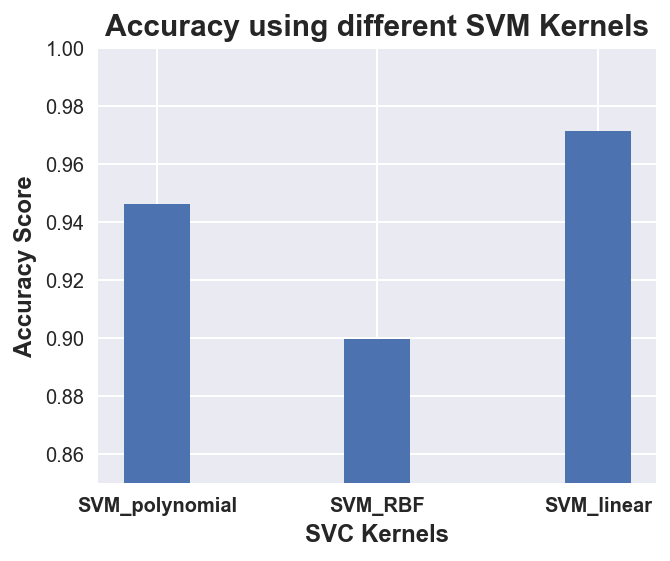

In [53]:
bar_width = 0.3
plt.figure(figsize=(5,4))
plt.ylim((0.85,1.0))
plt.bar(range(len(svm_compare)),svm_compare.values(),bar_width,align='center')
plt.xticks(range(len(svm_compare)),svm_compare.keys(),fontweight='bold')
plt.xlabel('SVC Kernels',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy Score',fontsize=12,fontweight='bold')
plt.title('Accuracy using different SVM Kernels',fontsize=15,fontweight='bold')
plt.show()

#### Consider 'linear' kernel with C='0.10' which gives the best accuracy

In [54]:
prediction["SVM"] = svc_linear.predict(X_test_df)

In [55]:
accuracy["SVM"] = accuracy_score(y_test,prediction["SVM"])
print(accuracy["SVM"])

0.971274685817


In [56]:
print(classification_report(y_test, prediction['SVM'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.97      0.99      0.98       467
       Spam       0.96      0.86      0.91        90

avg / total       0.97      0.97      0.97       557



In [57]:
conf_mat["SVM"] = confusion_matrix(y_test, prediction['SVM'])
conf_mat_normalized = conf_mat["SVM"].astype('float') / conf_mat["SVM"].sum(axis=1)[:, np.newaxis]

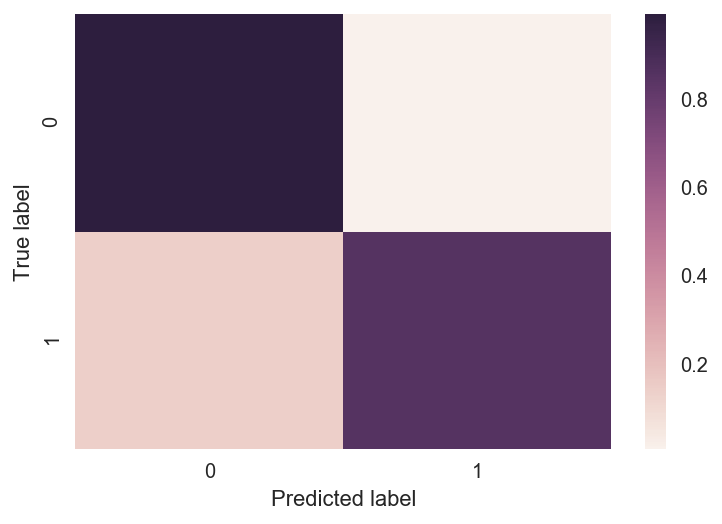

In [58]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [59]:
print(conf_mat["SVM"])

[[464   3]
 [ 13  77]]


In [60]:
print(roc_auc_score(y_test,prediction["SVM"]))

0.924565786343


In [61]:
fpr["SVM"], tpr["SVM"], threshold = metrics.roc_curve(y_test,prediction["SVM"])
roc_auc["SVM"] = metrics.auc(fpr["SVM"], tpr["SVM"])

## 4.5. K-NN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
prediction["K_NN"] = knnModel.predict(X_test_df)

In [64]:
accuracy["K_NN"] = accuracy_score(y_test,prediction["K_NN"])
print(accuracy["K_NN"])

0.903052064632


In [65]:
print(classification_report(y_test, prediction['K_NN'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.90      1.00      0.95       467
       Spam       1.00      0.40      0.57        90

avg / total       0.91      0.90      0.88       557



In [66]:
conf_mat["K_NN"] = confusion_matrix(y_test, prediction['K_NN'])
conf_mat_normalized = conf_mat["K_NN"].astype('float') / conf_mat["K_NN"].sum(axis=1)[:, np.newaxis]

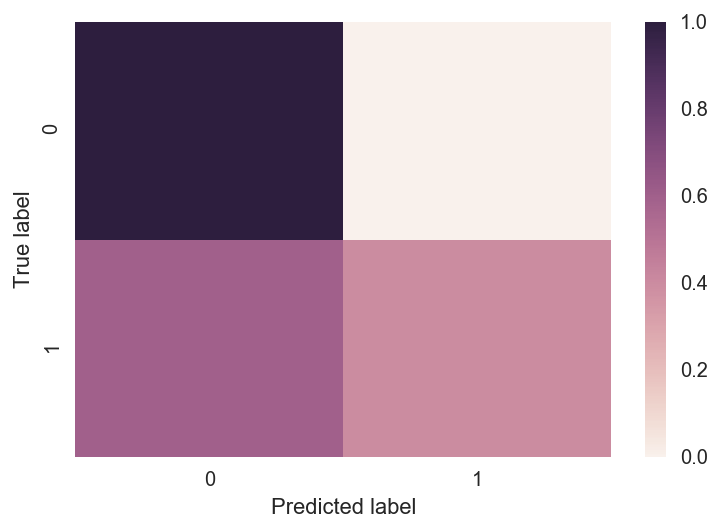

In [67]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [68]:
print(conf_mat["K_NN"])

[[467   0]
 [ 54  36]]


## 4.5.1. Parameter Tuning using GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
k_range = np.arange(1,30)
param_grid = dict(n_neighbors=k_range)
print(param_grid)
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)
print(grid.best_estimator_)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [70]:
prediction["K_NN"] = grid.predict(X_test_df)

In [71]:
accuracy["K_NN"] = accuracy_score(y_test,prediction["K_NN"])
print(accuracy["K_NN"])

0.942549371634


In [72]:
print(classification_report(y_test, prediction['K_NN'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.94      1.00      0.97       467
       Spam       1.00      0.64      0.78        90

avg / total       0.95      0.94      0.94       557



In [73]:
conf_mat["K_NN"] = confusion_matrix(y_test, prediction['K_NN'])
conf_mat_normalized = conf_mat["K_NN"].astype('float') / conf_mat["K_NN"].sum(axis=1)[:, np.newaxis]

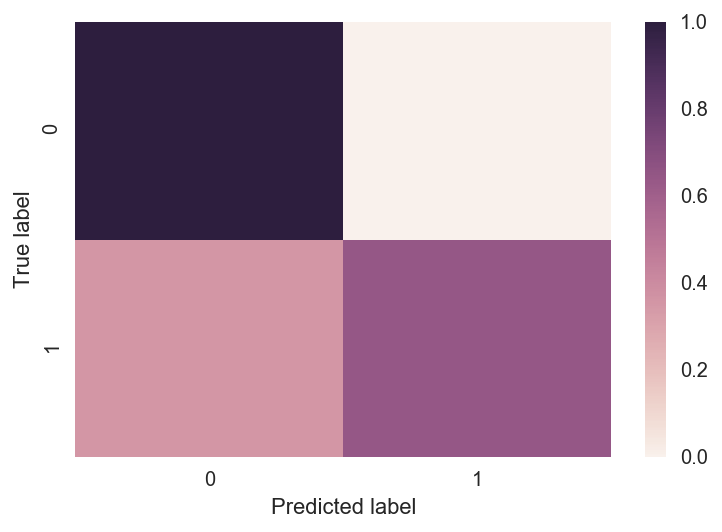

In [74]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [75]:
print(conf_mat["K_NN"])

[[467   0]
 [ 32  58]]


In [76]:
print(roc_auc_score(y_test,prediction["K_NN"]))

0.822222222222


In [77]:
fpr["K_NN"], tpr["K_NN"], threshold = metrics.roc_curve(y_test,prediction["K_NN"])
roc_auc["K_NN"] = metrics.auc(fpr["K_NN"], tpr["K_NN"])

## 4.6. Ada Boost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
adaModel = AdaBoostClassifier(n_estimators=80, random_state=1)
adaModel.fit(X_train_df,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=80, random_state=1)

In [79]:
prediction["Ada_Boost"] = adaModel.predict(X_test_df)

In [80]:
accuracy["Ada_Boost"] = accuracy_score(y_test,prediction["Ada_Boost"])
print(accuracy["Ada_Boost"])

0.967684021544


In [81]:
print(classification_report(y_test, prediction['Ada_Boost'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.96      1.00      0.98       467
       Spam       0.99      0.81      0.89        90

avg / total       0.97      0.97      0.97       557



In [82]:
conf_mat["Ada_Boost"] = confusion_matrix(y_test, prediction['Ada_Boost'])
conf_mat_normalized = conf_mat["Ada_Boost"].astype('float') / conf_mat["Ada_Boost"].sum(axis=1)[:, np.newaxis]

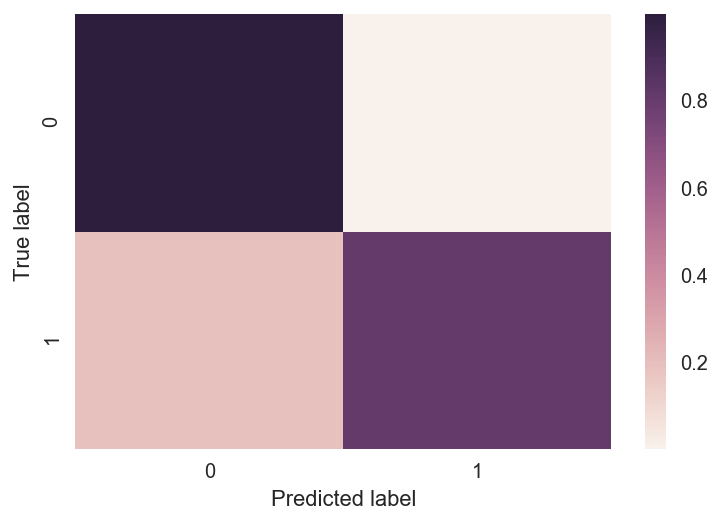

In [83]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [84]:
print(conf_mat["Ada_Boost"])

[[466   1]
 [ 17  73]]


In [85]:
print(roc_auc_score(y_test,prediction["Ada_Boost"]))

0.904484891744


In [86]:
fpr["Ada_Boost"], tpr["Ada_Boost"], threshold = metrics.roc_curve(y_test,prediction["Ada_Boost"])
roc_auc["Ada_Boost"] = metrics.auc(fpr["Ada_Boost"], tpr["Ada_Boost"])

## 4.7. Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtModel= DecisionTreeClassifier(min_samples_split=4, random_state=1,class_weight='balanced')
dtModel.fit(X_train_df,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [88]:
prediction["Decision_Tree"] = dtModel.predict(X_test_df)

In [89]:
accuracy["Decision_Tree"] = accuracy_score(y_test,prediction["Decision_Tree"])
print(accuracy["Decision_Tree"])

0.960502692998


In [90]:
print(classification_report(y_test, prediction['Decision_Tree'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.98      0.98      0.98       467
       Spam       0.88      0.88      0.88        90

avg / total       0.96      0.96      0.96       557



In [91]:
conf_mat["Decision_Tree"] = confusion_matrix(y_test, prediction['Decision_Tree'])
conf_mat_normalized = conf_mat["Decision_Tree"].astype('float') / conf_mat["Decision_Tree"].sum(axis=1)[:, np.newaxis]

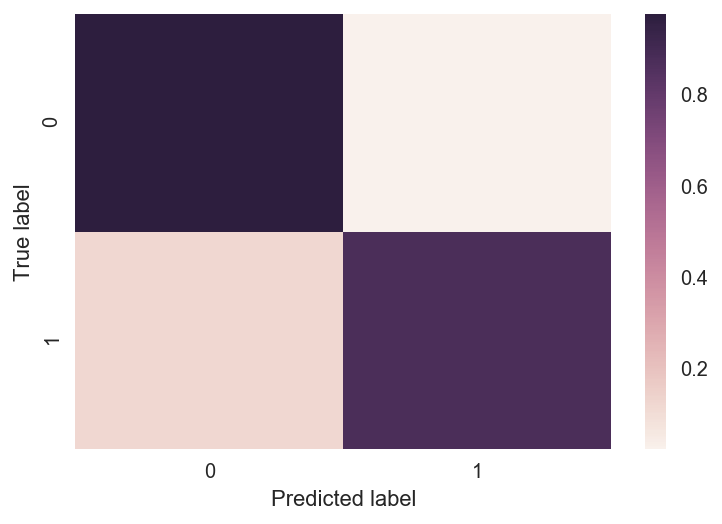

In [92]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [93]:
print(conf_mat["Decision_Tree"])

[[456  11]
 [ 11  79]]


In [94]:
print(roc_auc_score(y_test,prediction["Decision_Tree"]))

0.927111586962


In [95]:
fpr["Decision_Tree"], tpr["Decision_Tree"], threshold = metrics.roc_curve(y_test,prediction["Decision_Tree"])
roc_auc["Decision_Tree"] = metrics.auc(fpr["Decision_Tree"], tpr["Decision_Tree"])

## 4.8. Neural Network

In [96]:
from sklearn.neural_network import MLPClassifier
nnModel = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=None, learning_rate_init=0.001, max_iter=100)
nnModel.fit(X_train_df,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [97]:
prediction["Neural_Network"] = nnModel.predict(X_test_df)

In [98]:
accuracy["Neural_Network"] = accuracy_score(y_test,prediction["Neural_Network"])
print(accuracy["Neural_Network"])

0.973070017953


In [99]:
print(classification_report(y_test, prediction['Neural_Network'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.97      1.00      0.98       467
       Spam       0.99      0.84      0.91        90

avg / total       0.97      0.97      0.97       557



In [100]:
conf_mat["Neural_Network"] = confusion_matrix(y_test, prediction['Neural_Network'])
conf_mat_normalized = conf_mat["Neural_Network"].astype('float') / conf_mat["Neural_Network"].sum(axis=1)[:, np.newaxis]

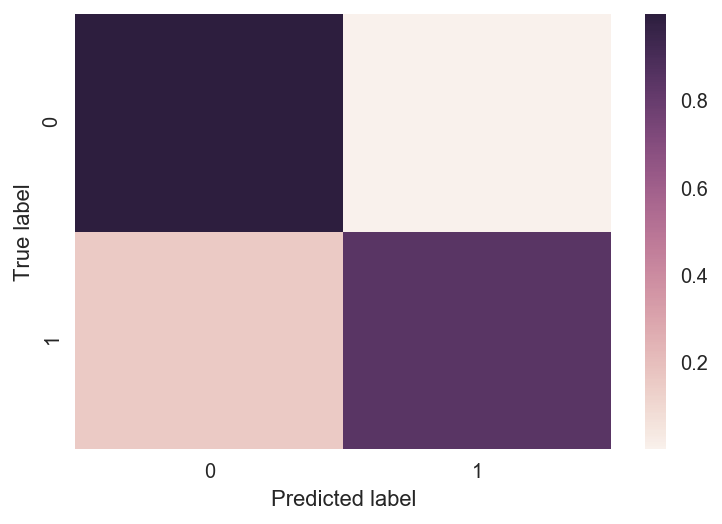

In [101]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [102]:
print(conf_mat["Neural_Network"])

[[466   1]
 [ 14  76]]


In [103]:
print(roc_auc_score(y_test,prediction["Neural_Network"]))

0.921151558411


In [104]:
fpr["Neural_Network"], tpr["Neural_Network"], threshold = metrics.roc_curve(y_test,prediction["Neural_Network"])
roc_auc["Neural_Network"]  = metrics.auc(fpr["Neural_Network"], tpr["Neural_Network"])

## 5. Evaluation of Models

## 5.1. By Classification Accuracy

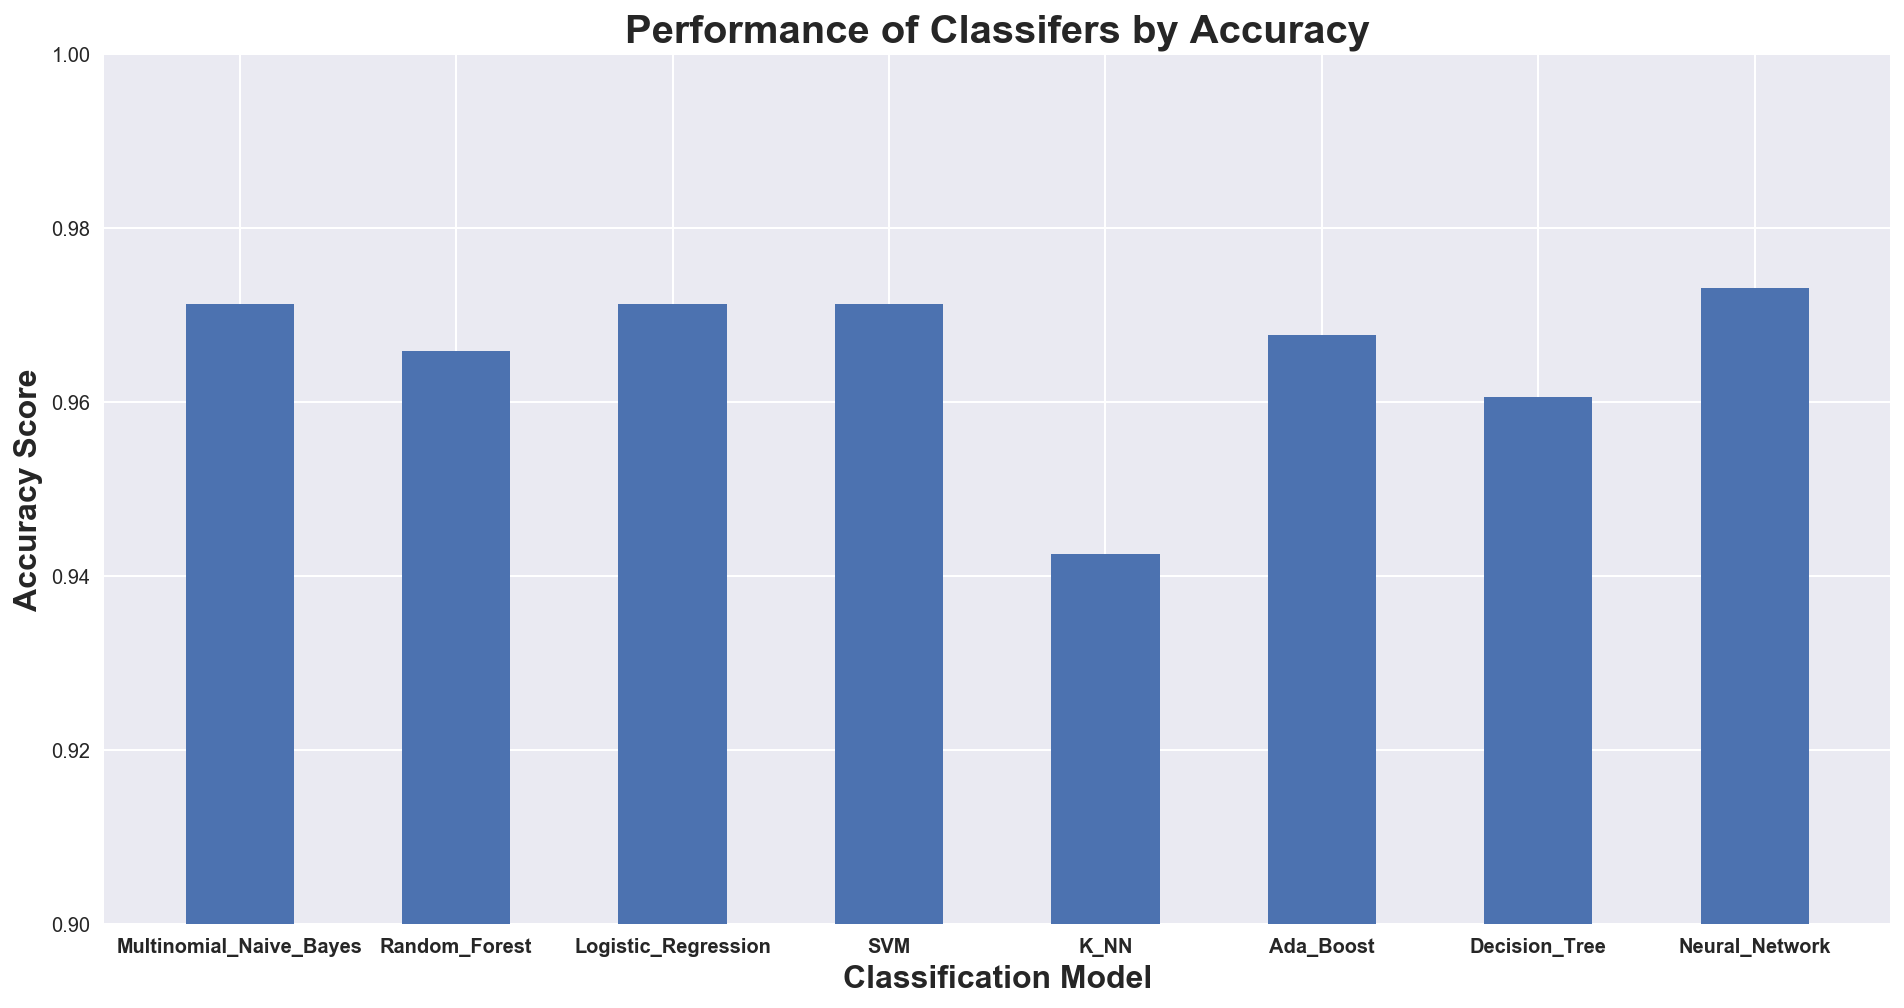

In [105]:
bar_width = 0.5
plt.figure(figsize=(16,8))
plt.ylim((0.9,1.0))
plt.bar(range(len(accuracy)),accuracy.values(),bar_width,align='center')
plt.xticks(range(len(accuracy)), accuracy.keys(),fontweight='bold')
plt.xlabel('Classification Model',fontsize=16,fontweight='bold')
plt.ylabel('Accuracy Score',fontsize=16,fontweight='bold')
plt.title('Performance of Classifers by Accuracy',fontsize=20,fontweight='bold')
plt.show()

## 5.2. By Confusion Matrices

In [106]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix for ' + title,fontweight='bold')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontweight='bold')
    plt.yticks(tick_marks, classes,fontweight='bold')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],4),
                 horizontalalignment="center",fontweight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout();
    plt.ylabel('True label',fontweight='bold');
    plt.xlabel('Predicted label',fontweight='bold')

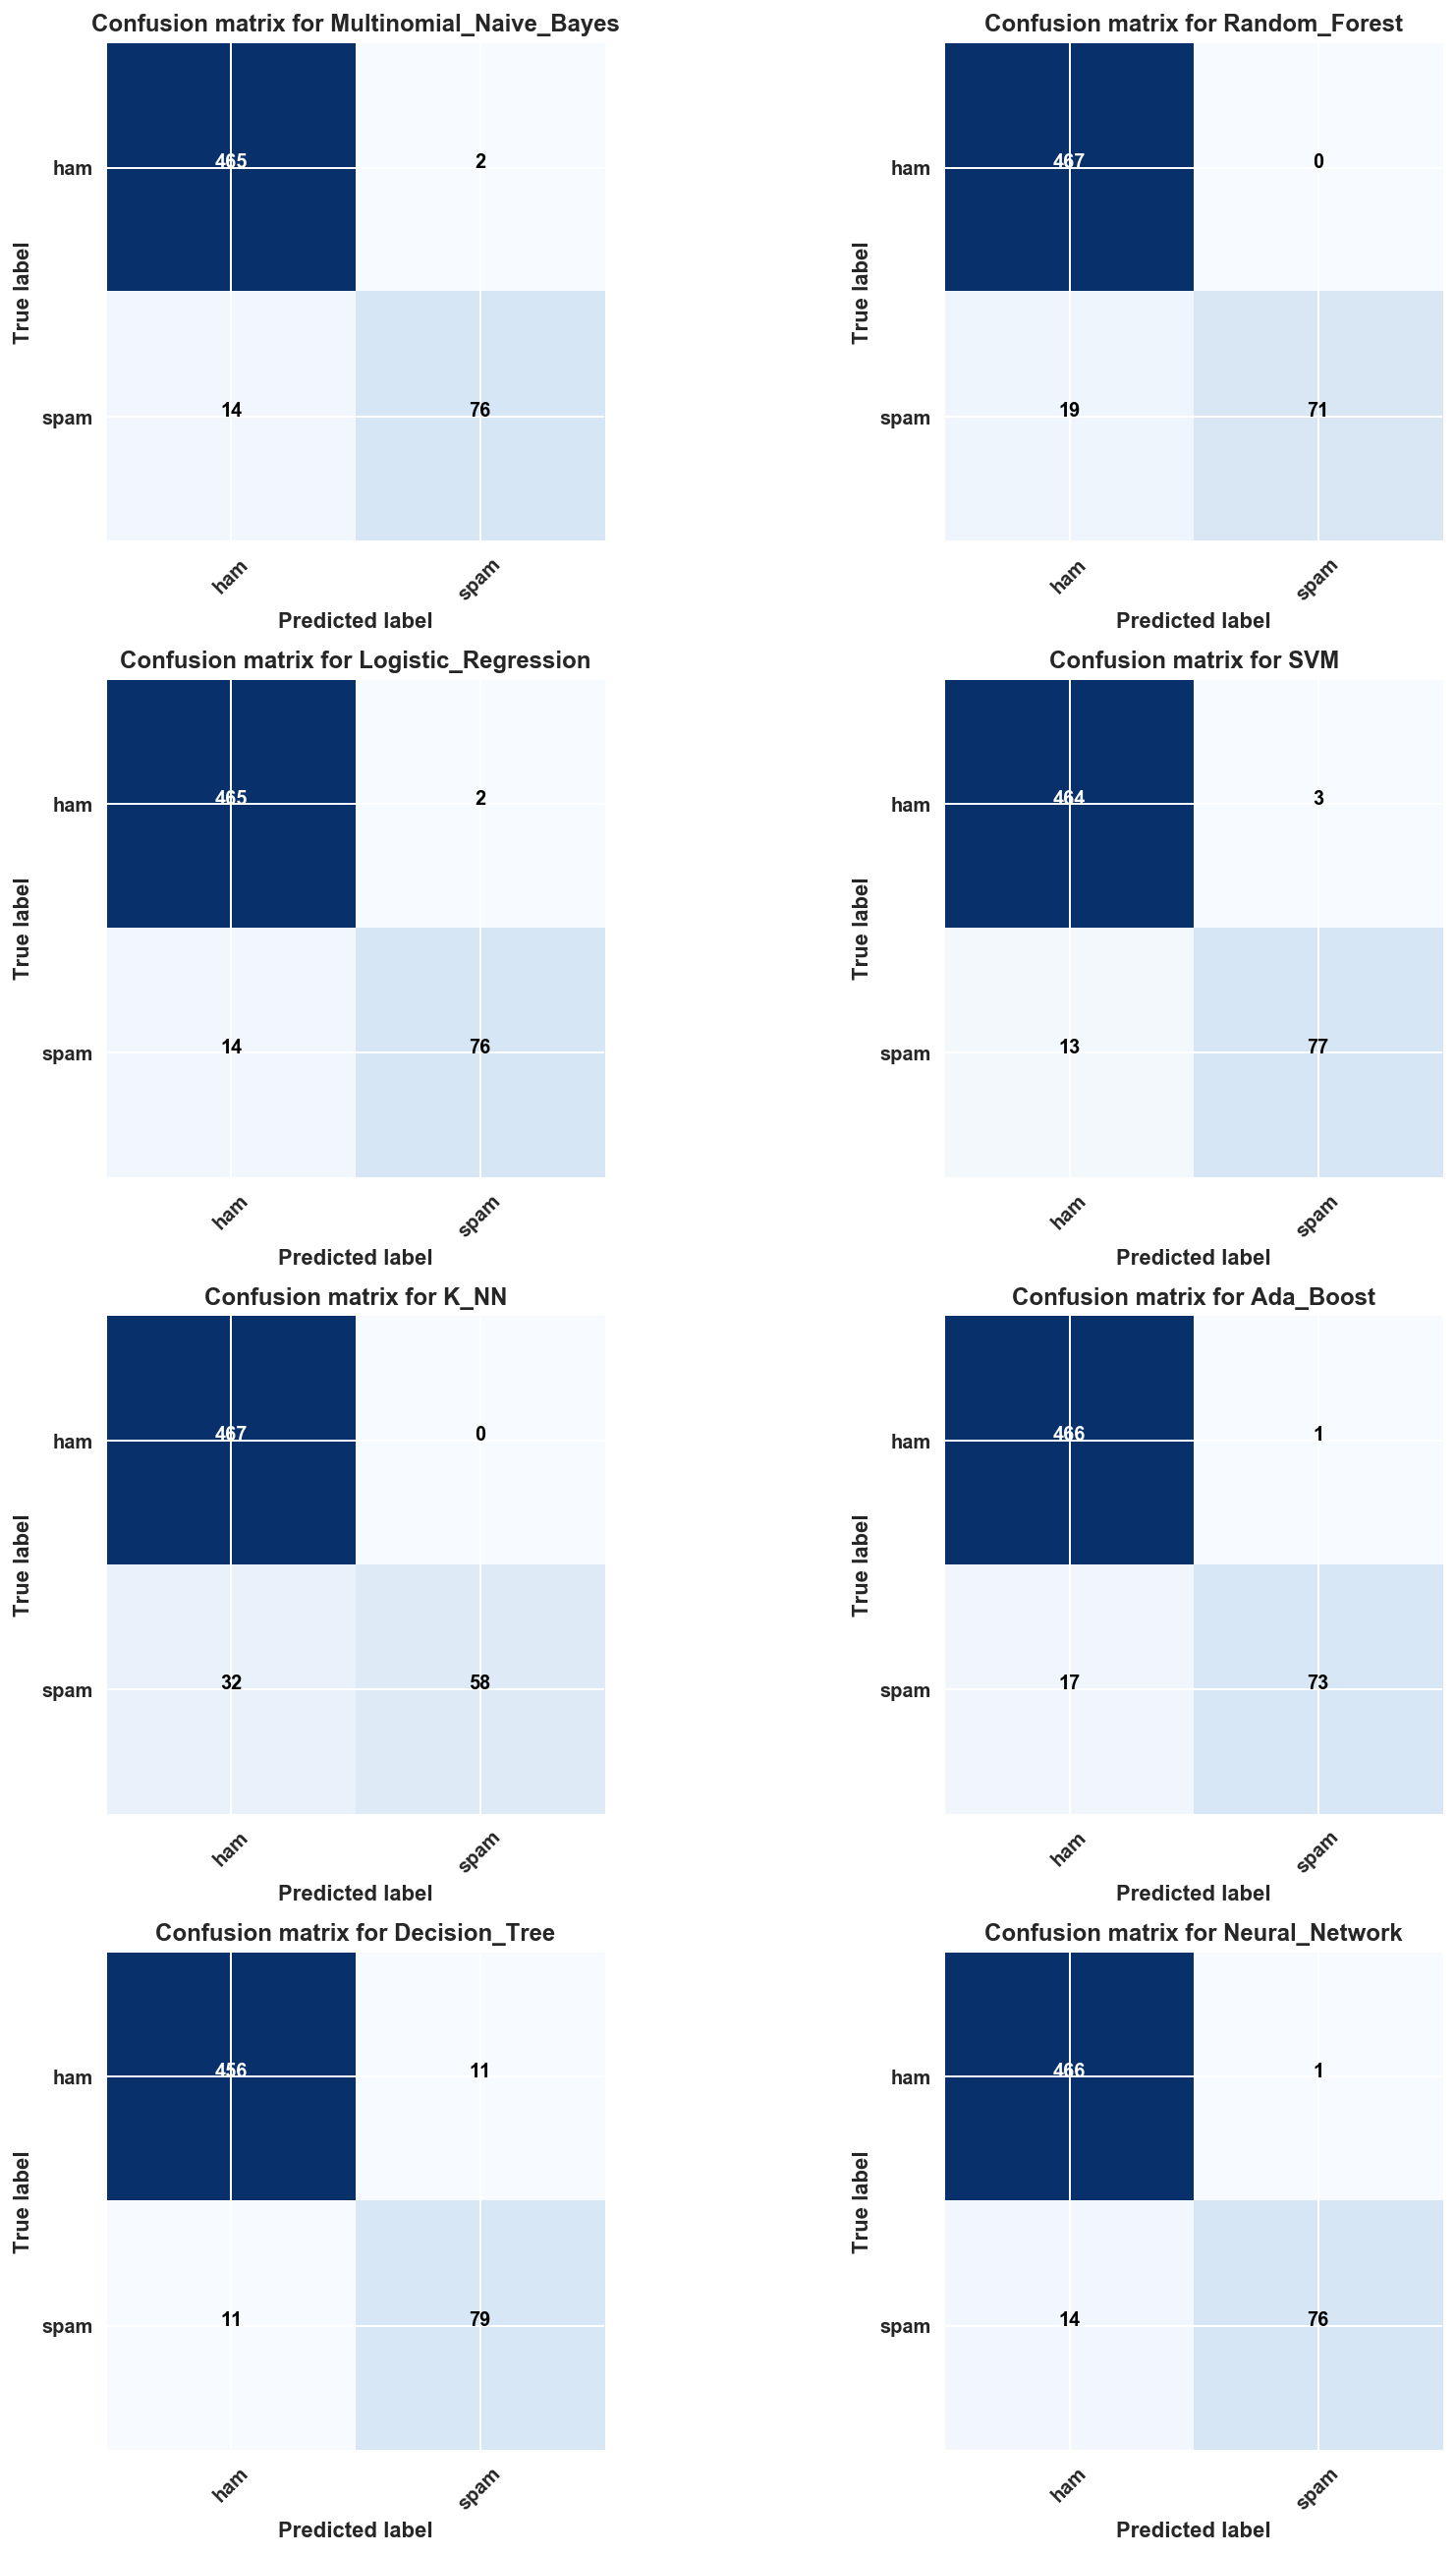

In [107]:
fig = plt.figure(figsize=(12,22))
i=1
for key,val in conf_mat.items():
    plt.subplot(5,2,i);
    i+=1
    plot_confusion_matrix(val,classes=['ham','spam'], normalize=False,title=key)

## 5.3. By ROC Curve

In [108]:
def plot_roc_curve(cm, normalize=False,
                          #title='ROC curve',
                       title=key,
                          cmap=plt.cm.Blues):
    plt.title('ROC for ' + title,fontweight='bold')
    plt.plot(fpr[key], tpr[key], 'b', label = 'AUC = %0.2f' % roc_auc[key])
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate',fontweight='bold')
    plt.xlabel('False Positive Rate',fontweight='bold')
    plt.tight_layout();

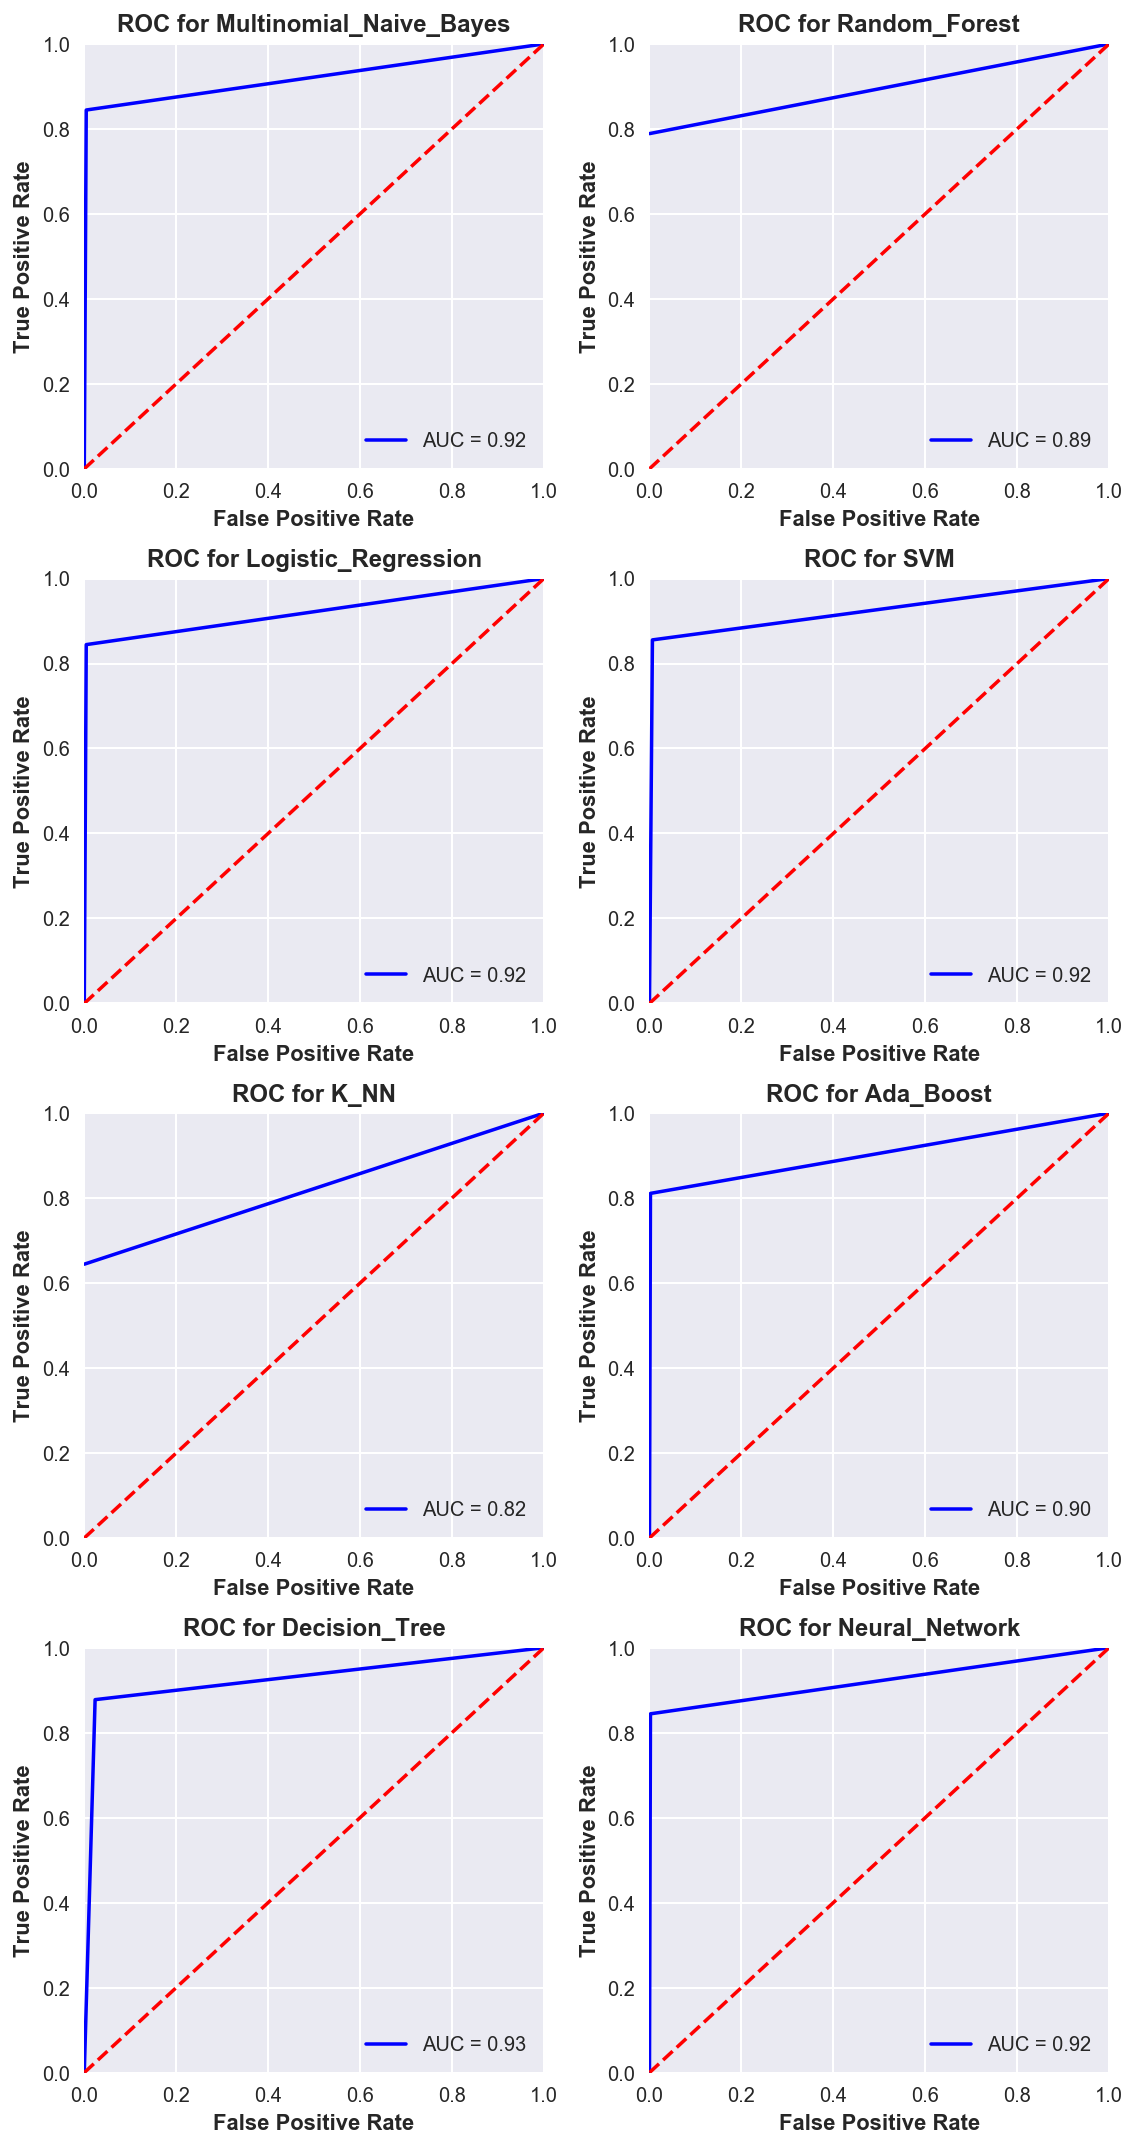

In [109]:
fig = plt.figure(figsize=(8,15))
i=1
for key,val in roc_auc.items():
    plt.subplot(4,2,i);
    i+=1
    plot_roc_curve(val,normalize=False,
                      title = key)

## 6. Comparing time for Multinomial NB and Neural Network

### Multinomial Naive Bayes

In [110]:
import time
trainAndTestTime = {}
start = time.time()
nb.fit(X_train_df,y_train)
prediction["Multinomial_Naive_Bayes"] = nb.predict(X_test_df)
end = time.time()
trainAndTestTime["Multinomial_Naive_Bayes"] = end - start
print("{:7.7f}s".format(trainAndTestTime["Multinomial_Naive_Bayes"]))

0.0200040s


### Neural Network

In [111]:
start = time.time()
nnModel.fit(X_train_df,y_train)
prediction["Neural_Network"] = nnModel.predict(X_test_df)
end = time.time()
trainAndTestTime["Neural_Network"] = end - start
print("{:7.7f}s".format(trainAndTestTime["Neural_Network"]))

68.6950836s


### Compare execution times

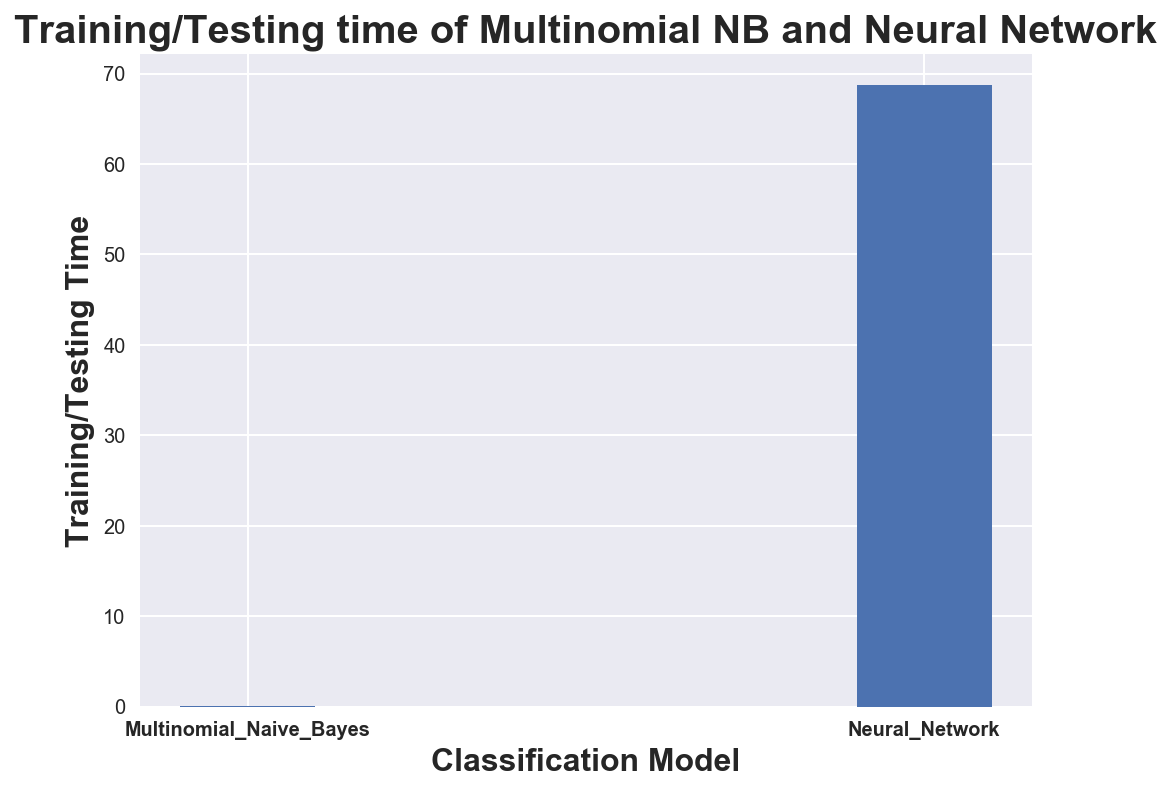

In [112]:
bar_width = 0.2
plt.figure(figsize=(8,6))
plt.bar(range(len(trainAndTestTime)),trainAndTestTime.values(),bar_width,align='center')
plt.xticks(range(len(trainAndTestTime)), trainAndTestTime.keys(),fontweight='bold')
plt.xlabel('Classification Model',fontsize=16,fontweight='bold')
plt.ylabel('Training/Testing Time',fontsize=16,fontweight='bold')
plt.title('Training/Testing time of Multinomial NB and Neural Network',fontsize=20,fontweight='bold')
plt.show()